In [154]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [5]:
# Make labels for the dataset (adhering to the same pattern as before)
Y = tf.range(-90, 110, 4) # or Y = X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

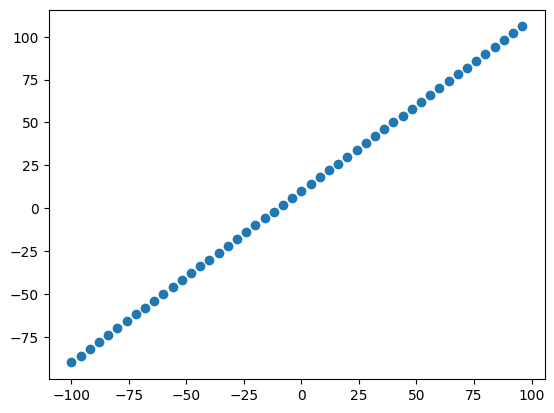

In [6]:
plt.scatter(X , Y)

In [7]:
# From the features(X,Y) , observation is Y = X+10

In [11]:
len(X) ,  len(Y)  # total elements in X

(50, 50)

In [14]:
x_train = X[:40]
y_train = Y[:40]

x_train.shape    ,   y_train.shape

(TensorShape([40]), TensorShape([40]))

In [27]:
x_test = X[40:]
y_test = Y[40:]

x_test  ,  y_test

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96])>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

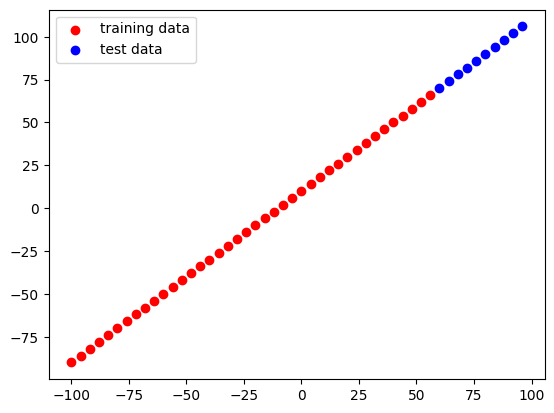

In [30]:
#plotting the training data

plt.scatter(x_train,y_train , c='r' , label='training data')
plt.scatter(x_test , y_test , c='b' , label='test data')
plt.legend()

# Creating Model

In [47]:
#seeting random seed
tf.random.set_seed(42)

#1. creating a model
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1, input_shape=[1] , name="input_layer")),
model_1.add(tf.keras.layers.Dense(1 , name = "output_layer"))


#2. compiling the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])
#3. fitting the model
model_1.fit(x_train , y_train,epochs=5,verbose=0) # verbose =0 or 1

In [48]:
# Model summary
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Model Summary information

Total params - total number of parameters in the model.

Trainable parameters - these are the parameters (patterns) the model can update as it trains.

Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

# 
Alongside summary, you can also view a 2D plot of the model using plot_model().

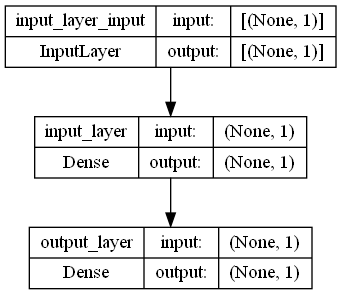

In [49]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

In [103]:
#5. Model predictions
y1_pred = model_1.predict(x_test)

1/1 [==============================] - 0s 32ms/step


In [104]:
y1_pred

array([[ 68.02374 ],
       [ 72.55281 ],
       [ 77.08188 ],
       [ 81.61095 ],
       [ 86.14001 ],
       [ 90.66908 ],
       [ 95.19816 ],
       [ 99.72722 ],
       [104.25629 ],
       [108.785355]], dtype=float32)

In [105]:
#let's create a plotting function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y1_pred):
    #plt.figure(figSize=(10,7))
    plt.scatter(train_data , train_labels,c='b' , label='train data')
    plt.scatter(test_data , test_labels , c = 'r' , label = 'test data')
    plt.scatter(test_data,predictions , c='g' , label='predictions')
    plt.legend()

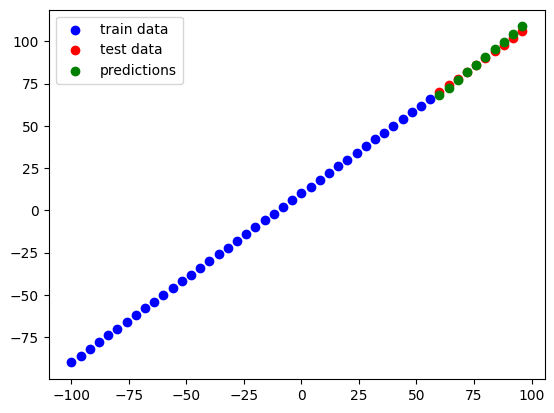

In [106]:
plot_predictions()

# Evaluation Metrics

Mean Absolute Error(MAE):  tf.keras.losses.MAE()  / tf.metrics.mean_absolute_error() - for any regression prob

Mean Square Error(MSE):   tf.keras.losses.MSE()  / tf.metrics.mean_square_error()  - when larger errors are more significant than smaller errors.

Huber:  tf.keras.losses.Huber()  - Combination of MSE & MAE. less sensitive to outliers than MSE.

In [69]:
#4. Evaluation Metrics

model_1.evaluate(x_test , y_test)

1/1 [==============================] - 0s 159ms/step - loss: 1.3507 - mae: 1.3507


[1.350672960281372, 1.350672960281372]

In [107]:
y1_pred

array([[ 68.02374 ],
       [ 72.55281 ],
       [ 77.08188 ],
       [ 81.61095 ],
       [ 86.14001 ],
       [ 90.66908 ],
       [ 95.19816 ],
       [ 99.72722 ],
       [104.25629 ],
       [108.785355]], dtype=float32)

In [108]:
y1_predictions = tf.constant(y1_pred)

y1_predictions

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.02374 ],
       [ 72.55281 ],
       [ 77.08188 ],
       [ 81.61095 ],
       [ 86.14001 ],
       [ 90.66908 ],
       [ 95.19816 ],
       [ 99.72722 ],
       [104.25629 ],
       [108.785355]], dtype=float32)>

In [109]:
# here, y_predictions shape= (10,1) but y_test shape =(10,)
#so, convert y_predictions to (10,)
y1_predictions = tf.squeeze(y1_predictions)
y1_predictions

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.02374 ,  72.55281 ,  77.08188 ,  81.61095 ,  86.14001 ,
        90.66908 ,  95.19816 ,  99.72722 , 104.25629 , 108.785355],
      dtype=float32)>

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [131]:
#calculate mean absolute error
mae_1 = tf.metrics.mean_absolute_error(y_test , y1_predictions)

mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=1.350673>

In [132]:
#calculate mean square error
mse_1 = tf.metrics.mean_squared_error(y_test , y1_predictions)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=2.4729428>

In [114]:
# make some functions to reuse MAE & MSE

def mae(y_true , y_predi):
    return tf.metrics.mean_absolute_error(y_true,y_predi)

def mse(y_true , y_predi):
    return tf.metrics.mean_squared_error(y_true , y_predi)

In [115]:
mae(y_test,y1_predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=1.350673>

In [116]:
mse(y_test,y1_predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=2.4729428>

In [94]:
#5. finding predictions

model_1.predict([17])

1/1 [==============================] - 0s 495ms/step


array([[19.33625]], dtype=float32)

In [96]:
model_1.predict([100])

1/1 [==============================] - 1s 648ms/step


array([[113.31443]], dtype=float32)

# Improving the model

In [99]:
tf.random.set_seed(42)

#1. creating a model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(1, input_shape=[1] , name="input_layer")),
model_2.add(tf.keras.layers.Dense(100,activation='relu')),
model_2.add(tf.keras.layers.Dense(100,activation='relu')),
model_2.add(tf.keras.layers.Dense(1 , name = "output_layer"))


#2. compiling the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ['mae'])
#3. fitting the model
model_2.fit(x_train , y_train,epochs=50,verbose=1) # verbose =0 or 1

Epoch 1/50
2/2 [==============================] - 1s 9ms/step - loss: 34.8828 - mae: 34.8828
Epoch 2/50
2/2 [==============================] - 0s 5ms/step - loss: 15.6866 - mae: 15.6866
Epoch 3/50
2/2 [==============================] - 0s 8ms/step - loss: 12.3041 - mae: 12.3041
Epoch 4/50
2/2 [==============================] - 0s 6ms/step - loss: 12.7065 - mae: 12.7065
Epoch 5/50
2/2 [==============================] - 0s 4ms/step - loss: 6.7858 - mae: 6.7858
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 8.4402 - mae: 8.4402
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 7.1841 - mae: 7.1841
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 6.0663 - mae: 6.0663
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 6.9461 - mae: 6.9461
Epoch 10/50
2/2 [==============================] - 0s 8ms/step - loss: 7.5782 - mae: 7.5782
Epoch 11/50
2/2 [==============================] - 0s 5ms/step - loss: 5.4209 - m

In [101]:
model_2.predict([100])

1/1 [==============================] - 0s 32ms/step


array([[116.645584]], dtype=float32)

In [128]:
y2_pred = model_2.predict(x_test)
y2_predictions= tf.constant(y2_pred)
y2_predictions= tf.squeeze(y2_predictions)
y2_predictions.shape   ,  y_test.shape

1/1 [==============================] - 0s 17ms/step


(TensorShape([10]), TensorShape([10]))

In [135]:
mae_2 = tf.metrics.mean_absolute_error(y_test , y2_predictions)
mse_2 = tf.metrics.mean_squared_error(y_test , y2_predictions)
mae_2  ,  mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=4.286438>,
 <tf.Tensor: shape=(), dtype=float32, numpy=19.891434>)

# Comparing & Tracking the models

In [137]:
# Let's compare our models(model_1 , model_2) using a pandas dataframe
import pandas as pd 

model_results = [["model_1" , mae_1 , mse_1],
                 ["model_2" , mae_2 , mse_2]]
all_results = pd.DataFrame(model_results , columns=['model' , 'mae' , 'mse'])
all_results

,model,mae,mse
0,model_1,"tf.Tensor(1.350673, shape=(), dtype=float32)","tf.Tensor(2.4729428, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(4.286438, shape=(), dtype=float32)","tf.Tensor(19.891434, shape=(), dtype=float32)"


In [138]:
# converting above in simpler format
model_results = [["Model_1" , mae_1.numpy() , mse_1.numpy()],
                 ["Model_2" , mae_2.numpy() , mse_2.numpy()]]

all_results = pd.DataFrame(model_results , columns= ['model_Name' , "MAE" , "MSE"])
all_results

,model_Name,MAE,MSE
0,Model_1,1.350673,2.472943
1,Model_2,4.286438,19.891434


In [139]:
# Looks like, Model_1 performed well

model_1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [141]:
# Tracking your experiements

#In AI/ML , we have many tools to track our model experiments:
#1. TensorBoard : A component of the TensorFlow library to help track modeling experiments. # https://www.tensorflow.org/tensorboard/get_started#:~:text=TensorBoard%20is%20a%20tool%20for,dimensional%20space%2C%20and%20much%20more.
#2. Weights & Biases - A toold for tracking all of kinds of ML experiments(plugs straight into TF.) # https://wandb.ai/site


# Saving our Models

Saving our models allows us to use them outside of Google Colab(or whenever they were trained) 

In [144]:
#Save the entire model as a SavedModel
#Method 1: SavedModel format (default)
!mkdir -p saved_models
model_1.save('saved_models/regression_model_2')

INFO:tensorflow:Assets written to: saved_models/regression_model_2\assets


INFO:tensorflow:Assets written to: saved_models/regression_model_2\assets


In [145]:
#Method 2: HDF5 format  - https://en.wikipedia.org/wiki/Hierarchical_Data_Format
#save the entire model to a HDF5 file. the .h5 extension indicates that the model should be saved to HDF5
model_1.save('saved_models/reg_model2.h5')

# Loading the saved model

In [146]:
#Load in the SavedModel format model
saved_model_2 = tf.keras.models.load_model('saved_models/regression_model_2')
saved_model_2.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [147]:
model_1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [149]:
# Compare model_2 with the SavedModel version (should return True)
model_1_preds = model_1.predict(x_test)
saved_model_preds = saved_model_2.predict(x_test)
model_1_preds == saved_model_preds



1/1 [==============================] - 0s 49ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [155]:
mae(y_test,y1_predictions) == mae(y_test , saved_model_preds)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([False, False, False, False, False, False, False, False, False,
       False])>

In [152]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("saved_models/reg_model2.h5")
loaded_h5_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
 output_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


# Download a model(or any file) from google colab

1. you can go to the 'files' tab and right click on the file you're after and click 'download' . 

2. use code(see the cell below)

3. Save it to Google Drive by connecting Google Drive and copying it there(code is below)



In [156]:
#download a file from google colab
from google.colab import files

files.download("00_TensorFlow_Fundamentals.ipynb")

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
#Referrence: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/01_neural_network_regression_in_tensorflow.ipynb